In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
HIV_df = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report (1).csv")
HIV_df.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,1.4,1.4,0.0


In [18]:
length_of_df = len(HIV_df)
length_of_df

31925

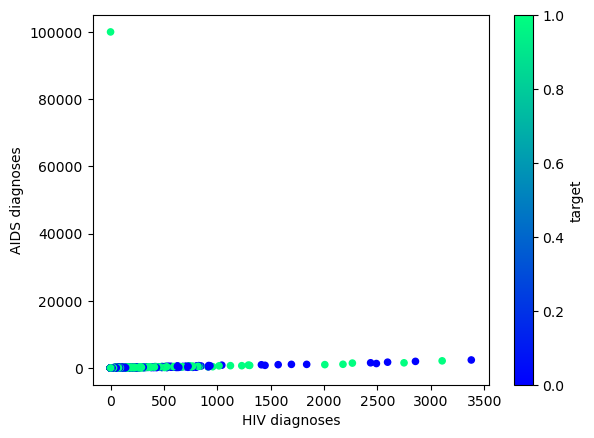

In [19]:
X,y = make_moons(n_samples=31925, noise = 0.8, random_state=1)
y = y.reshape(-1,1)
HIV_df['target'] = y

HIV_df.plot.scatter(x="HIV diagnoses", y="AIDS diagnoses", c = "target", colormap='winter')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [21]:
stdscaler = StandardScaler()

In [22]:
stdscaler.fit(X_train)

StandardScaler()

In [23]:
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled = stdscaler.transform(X_test)

In [24]:
model_nn = Sequential()

In [25]:
number_of_neurons = 8
input_dim = 2

model_nn.add(Dense(units=number_of_neurons, activation = "relu", input_dim=input_dim))

In [26]:
number_of_neurons_output = 1

model_nn.add(Dense(units=number_of_neurons_output, activation = "sigmoid"))

In [27]:
model_nn.build(X_train.shape)

In [28]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model_nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
model_nn_fitted = model_nn.fit(X_train_scaled, y_train , epochs = 100)

Epoch 1/100
749/749 [==============================] - 3s 3ms/step - loss: 0.5274 - accuracy: 0.7441
Epoch 2/100
749/749 [==============================] - 2s 2ms/step - loss: 0.5210 - accuracy: 0.7456
Epoch 3/100
749/749 [==============================] - 2s 2ms/step - loss: 0.5203 - accuracy: 0.7466
Epoch 4/100
749/749 [==============================] - 2s 2ms/step - loss: 0.5198 - accuracy: 0.7462
Epoch 5/100
749/749 [==============================] - 2s 2ms/step - loss: 0.5197 - accuracy: 0.7466
Epoch 6/100
749/749 [==============================] - 1s 2ms/step - loss: 0.5195 - accuracy: 0.7468
Epoch 7/100
749/749 [==============================] - 2s 2ms/step - loss: 0.5193 - accuracy: 0.7474
Epoch 8/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5192 - accuracy: 0.7469
Epoch 9/100
749/749 [==============================] - 2s 2ms/step - loss: 0.5191 - accuracy: 0.7463
Epoch 10/100
749/749 [==============================] - 2s 2ms/step - loss: 0.5189 - accura

749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7461
Epoch 82/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7459
Epoch 83/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7461
Epoch 84/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7464
Epoch 85/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7462
Epoch 86/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7454
Epoch 87/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7464
Epoch 88/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5177 - accuracy: 0.7458
Epoch 89/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7461
Epoch 90/100
749/749 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 

In [31]:
model_nn_fitted_df = pd.DataFrame(model_nn_fitted.history)

<Axes: >

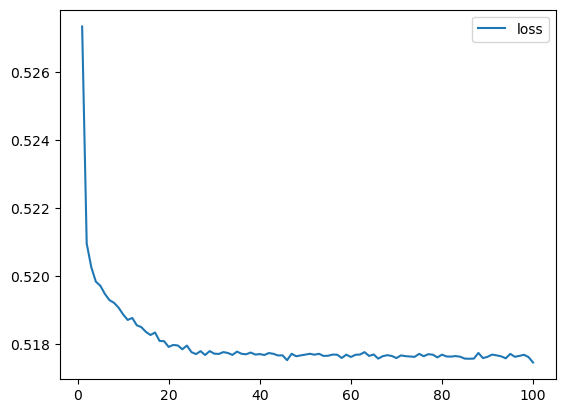

In [32]:
model_nn_fitted_df.index += 1

model_nn_fitted_df.plot(y="loss")

<Axes: >

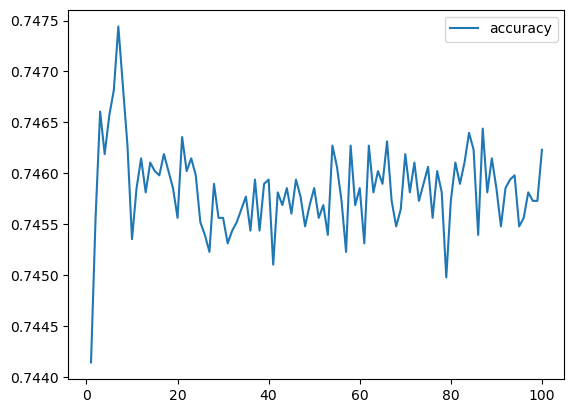

In [33]:
model_nn_fitted_df.plot(y="accuracy")

In [34]:
model_loss, model_accuracy = model_nn.evaluate(X_test_scaled, y_test, verbose = 2)

250/250 - 1s - loss: 0.5222 - accuracy: 0.7405 - 760ms/epoch - 3ms/step


In [35]:
print(f"loss: {model_loss}, accuracy: {model_accuracy}")

loss: 0.522217333316803, accuracy: 0.7405412197113037
